In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("data/hr/human-resources-analytics.zip",compression='zip')

In [3]:
len(df)

14999

In [4]:
len(df.columns)

10

In [5]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [6]:
df.isnull().sum()*100/len(df)

satisfaction_level       0.0
last_evaluation          0.0
number_project           0.0
average_montly_hours     0.0
time_spend_company       0.0
Work_accident            0.0
left                     0.0
promotion_last_5years    0.0
sales                    0.0
salary                   0.0
dtype: float64

In [7]:
df.describe(include='all')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


In [8]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [9]:
df.sales.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

In [10]:
df.left.value_counts()*100/len(df)

0    76.191746
1    23.808254
Name: left, dtype: float64

In [11]:
df.salary.value_counts()/len(df)

low       0.487766
medium    0.429762
high      0.082472
Name: salary, dtype: float64

In [12]:
df1 = df[df['left']==0]
df1.salary.value_counts()*100/len(df1)

low       45.012251
medium    44.880994
high      10.106755
Name: salary, dtype: float64

In [13]:
df1 = df[df['left']==1]
df1.salary.value_counts()*100/len(df1)

low       60.823299
medium    36.880426
high       2.296276
Name: salary, dtype: float64

In [14]:
salary_map = {'low':1,'medium':2,'high':3}
df['salary_int'] = df.salary.map(salary_map)

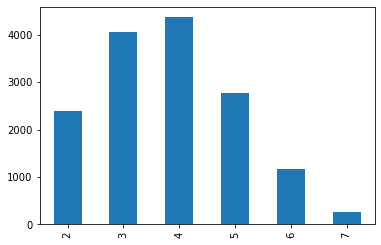

In [15]:
df['number_project'].value_counts().sort_index().plot(kind='bar')

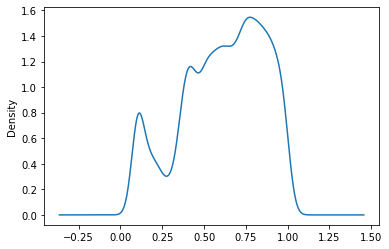

In [16]:
df['satisfaction_level'].plot.kde()

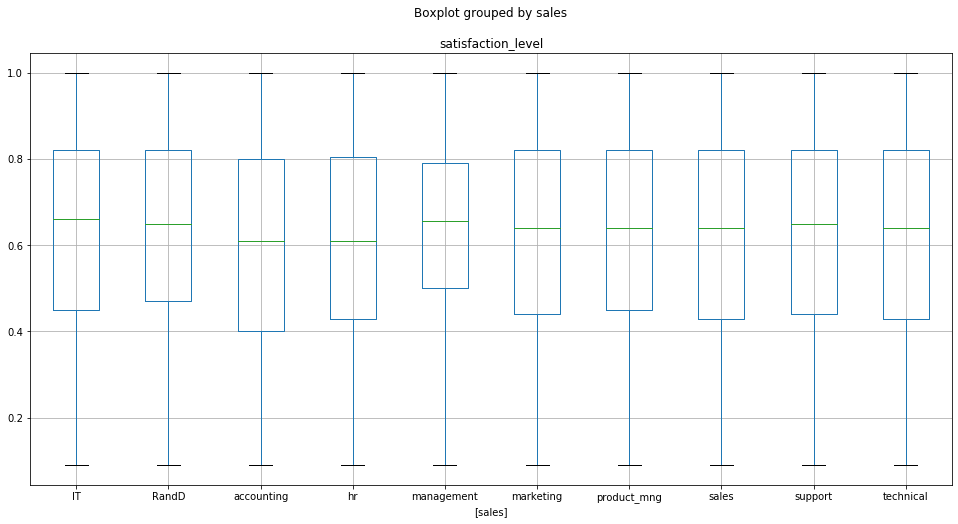

In [17]:
# box plot of satisfaction_level for each department
df[['sales','satisfaction_level']].boxplot(by='sales',figsize=(16,8))

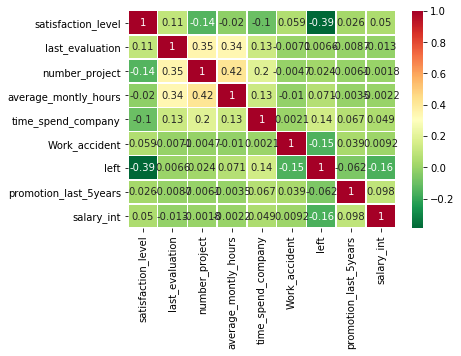

In [18]:
# heat map of correlation matrix
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn_r', linewidths=0.5)

In [19]:
df['colors'] = df.sales.apply(lambda x: x.lower()[0])

In [20]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary', 'salary_int', 'colors'],
      dtype='object')

/home/sasidhar/.conda/envs/training/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


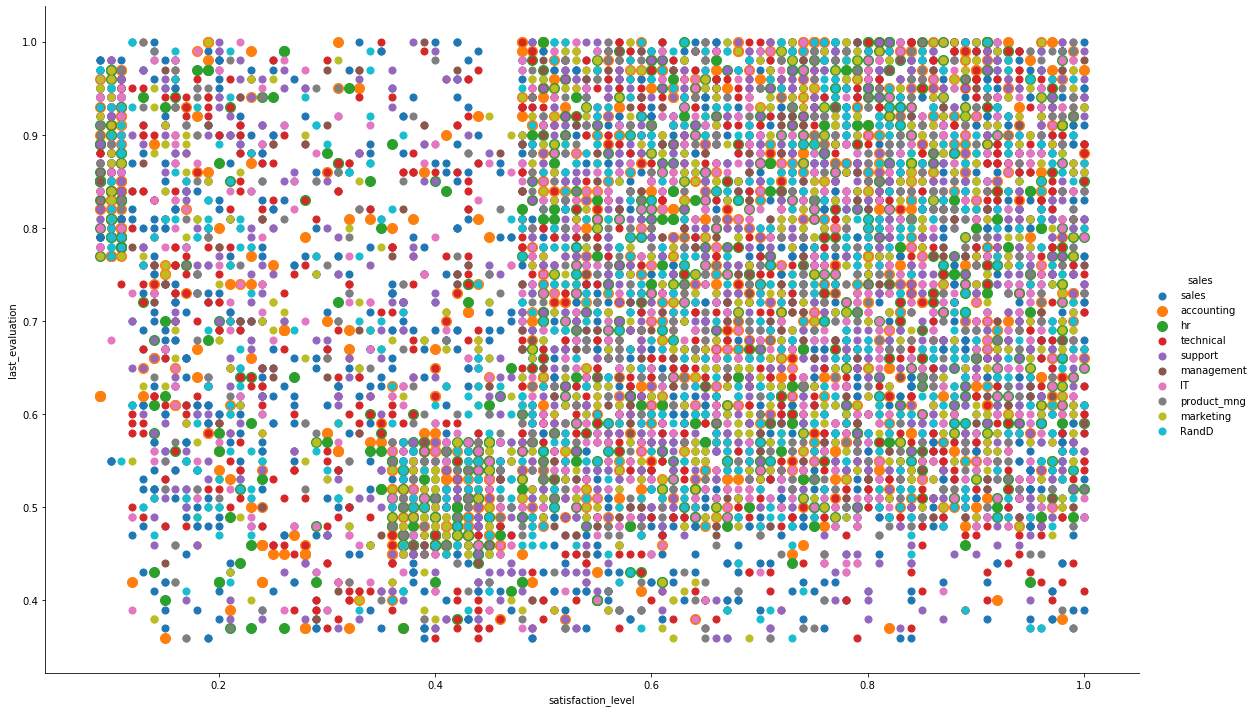

In [21]:
#scatter plot of satisfaction_level and last_evaluation for differt departments
# change the hue variables to see how the data is distributed

fg = sns.FacetGrid(data=df, hue='sales', aspect=1.61,size=10,
                   hue_kws={'s':df.salary_int*50})
fg.map(plt.scatter, 'satisfaction_level', 'last_evaluation').add_legend()

In [22]:
cols = ['sales','satisfaction_level']
df1 = df[df['left']==1]
df_grp = df1[cols].groupby(['sales'])
dx = df_grp.agg([len,np.sum,np.max,np.min,np.mean,np.std])
dx.columns = pd.MultiIndex.droplevel(dx.columns,0)
dx['pct_sat'] = dx['sum']*100/dx['len'].sum()
dx['left'] = 1
dx

,len,sum,amax,amin,mean,std,pct_sat,left
sales,,,,,,,,
IT,273.0,112.44,0.92,0.09,0.411868,0.271041,3.148698,1
RandD,121.0,52.37,0.92,0.09,0.432810,0.282230,1.466536,1
accounting,204.0,82.13,0.91,0.09,0.402598,0.256977,2.299916,1
hr,215.0,93.18,0.91,0.09,0.433395,0.243090,2.609353,1
management,91.0,38.48,0.90,0.09,0.422857,0.270248,1.077569,1
marketing,203.0,91.99,0.90,0.09,0.453153,0.249197,2.576029,1
product_mng,198.0,95.35,0.91,0.09,0.481566,0.264036,2.670120,1
sales,1014.0,453.93,0.92,0.09,0.447663,0.258455,12.711565,1
support,555.0,250.25,0.91,0.09,0.450901,0.263695,7.007841,1


In [23]:
cols = ['sales','satisfaction_level']
df1 = df[df['left']==0]
df_grp = df1[cols].groupby(['sales'])
dy = df_grp.agg([len,np.sum,np.max,np.min,np.mean,np.std])
dy.columns = pd.MultiIndex.droplevel(dy.columns,0)
dy['pct_sat'] = dy['sum']*100/dy['len'].sum()
dy['left'] = 0
dy

,len,sum,amax,amin,mean,std,pct_sat,left
sales,,,,,,,,
IT,954.0,646.02,1.0,0.12,0.677170,0.209040,5.652958,0
RandD,666.0,435.43,1.0,0.12,0.653799,0.221831,3.810203,0
accounting,563.0,364.38,1.0,0.12,0.647211,0.221350,3.188484,0
hr,524.0,349.34,1.0,0.13,0.666679,0.216091,3.056878,0
management,539.0,352.97,1.0,0.12,0.654861,0.201581,3.088642,0
marketing,655.0,438.77,1.0,0.12,0.669878,0.218826,3.839429,0
product_mng,704.0,463.56,1.0,0.13,0.658466,0.220944,4.056353,0
sales,3126.0,2089.88,1.0,0.12,0.668548,0.222123,18.287364,0
support,1674.0,1127.94,1.0,0.12,0.673799,0.213199,9.869968,0


In [24]:
dz = pd.concat([dx,dy],axis=1)
dz.sort_index()

,len,sum,amax,amin,mean,std,pct_sat,left,len,sum,amax,amin,mean,std,pct_sat,left
sales,,,,,,,,,,,,,,,,
IT,273.0,112.44,0.92,0.09,0.411868,0.271041,3.148698,1,954.0,646.02,1.0,0.12,0.677170,0.209040,5.652958,0
RandD,121.0,52.37,0.92,0.09,0.432810,0.282230,1.466536,1,666.0,435.43,1.0,0.12,0.653799,0.221831,3.810203,0
accounting,204.0,82.13,0.91,0.09,0.402598,0.256977,2.299916,1,563.0,364.38,1.0,0.12,0.647211,0.221350,3.188484,0
hr,215.0,93.18,0.91,0.09,0.433395,0.243090,2.609353,1,524.0,349.34,1.0,0.13,0.666679,0.216091,3.056878,0
management,91.0,38.48,0.90,0.09,0.422857,0.270248,1.077569,1,539.0,352.97,1.0,0.12,0.654861,0.201581,3.088642,0
marketing,203.0,91.99,0.90,0.09,0.453153,0.249197,2.576029,1,655.0,438.77,1.0,0.12,0.669878,0.218826,3.839429,0
product_mng,198.0,95.35,0.91,0.09,0.481566,0.264036,2.670120,1,704.0,463.56,1.0,0.13,0.658466,0.220944,4.056353,0
sales,1014.0,453.93,0.92,0.09,0.447663,0.258455,12.711565,1,3126.0,2089.88,1.0,0.12,0.668548,0.222123,18.287364,0
support,555.0,250.25,0.91,0.09,0.450901,0.263695,7.007841,1,1674.0,1127.94,1.0,0.12,0.673799,0.213199,9.869968,0


In [25]:
#df.pivot_table(aggfunc=len,index=['sales'])
#df.pivot_table(aggfunc=len,index=['sales'],columns=['left'],values=['satisfaction_level'])
df.pivot_table(aggfunc=np.mean,index=['sales'],columns=['salary','left'],values=['satisfaction_level'])

satisfaction_level                                          \
salary                    high                 low              medium   
left                         0         1         0         1         0   
sales                                                                    
IT                    0.641013  0.582500  0.681648  0.428314  0.679224   
RandD                 0.607021  0.347500  0.651294  0.470182  0.663387   
accounting            0.635217  0.322000  0.643282  0.393333  0.655064   
hr                    0.735897  0.265000  0.658560  0.476848  0.663678   
management            0.654375  0.420000  0.680496  0.467627  0.639433   
marketing             0.628310  0.423333  0.675833  0.443175  0.674123   
product_mng           0.641935  0.326667  0.661908  0.485810  0.657905   
sales                 0.660039  0.447143  0.669365  0.462999  0.669244   
support               0.662406  0.532500  0.673435  0.432674  0.676084   
technical             0.646705  0.480000  0.668833  0.398386  0.672181   

                       
salary                 
left                1  
sales                  
IT           0.375670  
RandD        0.405161  
accounting   0.415800  
hr           0.407863  
management   0.337742  
marketing    0.475588  
product_mng  0.487126  
sales        0.412409  
support      0.491646  
technical    0.472381

### Using RandomForest Classifier for predection

In [26]:
df_final = df.drop(['salary'],axis=1).copy()

In [27]:
df_final.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary_int                 int64
colors                    object
dtype: object

In [28]:
df_final.sales.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

In [29]:
pd.get_dummies(df_final,columns=['sales']).head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_int,colors,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical
0,0.38,0.53,2,157,3,0,1,0,1,s,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,2,s,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,2,s,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,1,s,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,1,s,0,0,0,0,0,0,0,1,0,0


In [30]:
df_final = pd.get_dummies(df_final,columns=['sales'])

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
y = df_final['left']
X = df_final.drop(['left','colors'],axis=1)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
X_train.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
promotion_last_5years      int64
salary_int                 int64
sales_IT                   uint8
sales_RandD                uint8
sales_accounting           uint8
sales_hr                   uint8
sales_management           uint8
sales_marketing            uint8
sales_product_mng          uint8
sales_sales                uint8
sales_support              uint8
sales_technical            uint8
dtype: object

In [35]:
clf = RandomForestClassifier()

In [36]:
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [37]:
y_pred = clf.predict(X_test)

In [38]:
my_list = list(zip(list(y_test),list(y_pred)))

In [39]:
wronng_cls = [pair for pair in list(enumerate(my_list)) if pair[1][0] != pair[1][1]]
wronng_cls[0:10]

[(102, (1, 0)),
 (114, (1, 0)),
 (130, (1, 0)),
 (132, (0, 1)),
 (320, (1, 0)),
 (460, (1, 0)),
 (473, (1, 0)),
 (509, (1, 0)),
 (571, (0, 1)),
 (620, (1, 0))]

In [40]:
len(X_test),len(wronng_cls)

(4950, 60)

In [41]:
1 - (1058.0/4950)

0.7862626262626262

In [42]:
X_test.iloc[102,:]

satisfaction_level         0.63
last_evaluation            0.83
number_project             6.00
average_montly_hours     242.00
time_spend_company         5.00
Work_accident              0.00
promotion_last_5years      0.00
salary_int                 1.00
sales_IT                   0.00
sales_RandD                0.00
sales_accounting           1.00
sales_hr                   0.00
sales_management           0.00
sales_marketing            0.00
sales_product_mng          0.00
sales_sales                0.00
sales_support              0.00
sales_technical            0.00
Name: 1453, dtype: float64

In [43]:
accuracy_score(y_test,y_pred)

0.9878787878787879

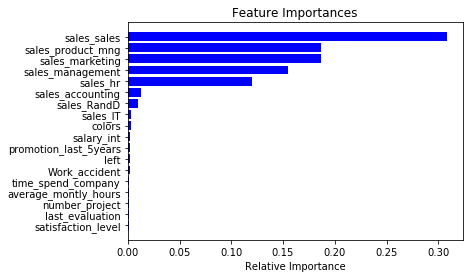

In [44]:
features = df_final.columns
importances = clf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features) ## removed [indices]
plt.xlabel('Relative Importance')
plt.show()

### Using Logistic Regression for predection

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
clf_lr = LogisticRegression()

In [47]:
clf_lr.fit(X_train,y_train)

/home/sasidhar/.conda/envs/training/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
y_pred = clf_lr.predict(X_test)

In [49]:
accuracy_score(y_test,y_pred)

0.7858585858585858